In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from collections import deque
from queue import PriorityQueue
mars_map = np.load('mars_map.npy')
nr, nc = mars_map.shape


In [3]:
mars_map

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [4]:
print(nr, nc)

1815 756


/tmp/ipykernel_2261/3300437665.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = copy.copy(plt.cm.get_cmap('autumn'))


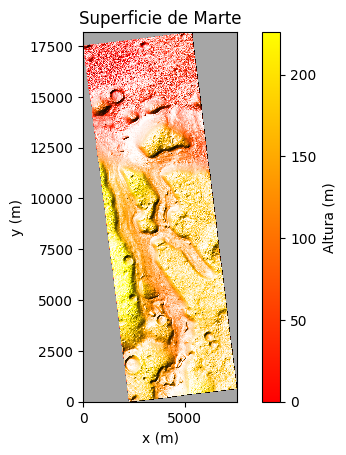

In [5]:
cmap = copy.copy(plt.cm.get_cmap('autumn'))
cmap.set_under(color='black')   
scale=10.0174
ls = LightSource(315, 45)
rgb = ls.shade(mars_map, cmap=cmap, vmin = 0, vmax = mars_map.max(), vert_exag=2, blend_mode='hsv')

fig, ax = plt.subplots()

im = ax.imshow(rgb, cmap=cmap, vmin = 0, vmax = mars_map.max(), 
                extent =[0, scale*nc, 0, scale*nr], 
                interpolation ='nearest', origin ='upper')

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Altura (m)')

plt.title('Superficie de Marte')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.show()


# Funciones

In [6]:
def cyr(matriz,x,y,scale):
    nr,nc=matriz.shape
    r=nr-round(y/scale)
    c=round(x/scale)
    return r,c


In [7]:
r,c=cyr(mars_map, 2850, 6400, scale)
print(mars_map[r,c])
print(r,c)

145.52597656250015
1176 285


In [21]:
def diferencia_altura(matriz,nodo1,nodo2):
    r1,c1=nodo1
    ra1,ca1=cyr(matriz,c1,r1,scale)
    r2,c2=nodo2
    ra2,ca2=cyr(matriz,c2,r2,scale)
    altura1=matriz[ra1,ca1]
    altura2=matriz[ra2,ca2]
    if altura1==-1 or altura2==-1:
        return False 
    distancia=np.abs(altura1-altura2)
    if distancia<=1.25:
        return True
    else:
        return False
    

In [ ]:
nodo1=(5001,5001)
nodo2=(5000,5000)
print(f"altura nodo1: {mars_map[cyr(mars_map,nodo1[0],nodo1[1],scale)[0],cyr(mars_map,nodo1[0],nodo1[1],scale)[1]]}")
print(f"altura nodo2: {mars_map[cyr(mars_map,nodo2[0],nodo2[1],scale)[0],cyr(mars_map,nodo2[0],nodo2[1],scale)[1]]}")
print(diferencia_altura(mars_map,nodo1,nodo2))

True


In [11]:
def obtener_vecinos(matriz, nodo):
    vecinos = []
    acciones = [(-1, 0), (1, 0), (0, -1), (0, 1),(1,1),(-1,1),(1,-1),(-1,-1)]  
    r, c = matriz.shape
    x, y = nodo
    for dx, dy in acciones:
        nx, ny = x + dx, y + dy
        if  diferencia_altura(matriz,nodo,(nx,ny)):  
            vecinos.append((nx, ny))
    return vecinos

In [12]:
nodo1=(5000,5000)
print(obtener_vecinos(mars_map,nodo1))

[(4999, 5000), (5001, 5000), (5000, 4999), (5000, 5001), (5001, 5001), (4999, 5001), (5001, 4999), (4999, 4999)]


# BFS

In [19]:
def bfs(matriz, origen, objetivo):
    explorados = set()
    frontera = deque([origen])
    padres = {origen: None}  

    while frontera:
        inicio = frontera.popleft()
        if inicio == objetivo:
            break
        explorados.add(inicio)
        for vecino in obtener_vecinos(matriz, inicio):
            if vecino not in explorados and vecino not in frontera:
                frontera.append(vecino)
                padres[vecino] = inicio  
    camino = []
    paso = objetivo
    while paso is not None:
        camino.append(paso)
        paso = padres[paso]
    camino.reverse() 

    return camino

In [24]:
origen=(2850,6400)
destino=(5150,6800)
camino=bfs(mars_map,origen,destino)
print(camino)
print(len(camino))

[(2850, 6400), (2851, 6400), (2852, 6400), (2853, 6400), (2854, 6400), (2855, 6400), (2856, 6400), (2857, 6400), (2858, 6400), (2859, 6400), (2860, 6400), (2861, 6400), (2862, 6400), (2863, 6400), (2864, 6400), (2865, 6400), (2866, 6400), (2867, 6400), (2868, 6400), (2869, 6400), (2870, 6400), (2871, 6400), (2872, 6400), (2873, 6400), (2874, 6400), (2875, 6400), (2876, 6400), (2877, 6400), (2878, 6400), (2879, 6400), (2880, 6400), (2881, 6400), (2882, 6400), (2883, 6400), (2884, 6400), (2885, 6400), (2886, 6400), (2887, 6400), (2888, 6400), (2889, 6400), (2890, 6400), (2891, 6400), (2892, 6400), (2893, 6400), (2894, 6400), (2895, 6400), (2896, 6400), (2897, 6400), (2898, 6400), (2899, 6400), (2900, 6400), (2901, 6400), (2902, 6400), (2903, 6400), (2904, 6400), (2905, 6400), (2906, 6400), (2907, 6400), (2908, 6400), (2909, 6400), (2910, 6400), (2911, 6400), (2912, 6400), (2913, 6400), (2914, 6400), (2915, 6400), (2916, 6400), (2917, 6400), (2918, 6400), (2919, 6400), (2920, 6400), (2921

/tmp/ipykernel_2261/2709742398.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = copy.copy(plt.cm.get_cmap('autumn'))


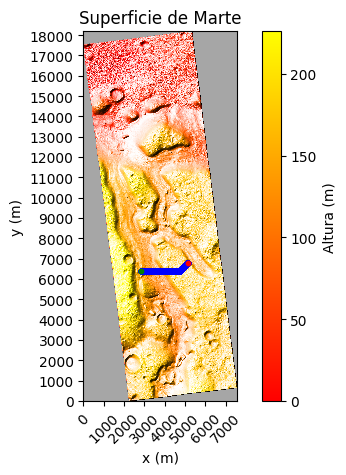

In [25]:
cmap = copy.copy(plt.cm.get_cmap('autumn'))
cmap.set_under(color='black')   
scale=10.0174
ls = LightSource(315, 45)
rgb = ls.shade(mars_map, cmap=cmap, vmin = 0, vmax = mars_map.max(), vert_exag=2, blend_mode='hsv')

fig, ax = plt.subplots()

im = ax.imshow(rgb, cmap=cmap, vmin = 0, vmax = mars_map.max(), 
                extent =[0, scale*nc, 0, scale*nr], 
                interpolation ='nearest', origin ='upper')

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Altura (m)')

plt.title('Superficie de Marte')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.scatter([x[0] for x in camino], [x[1] for x in camino], color='blue', s=10)
plt.scatter(origen[0], origen[1], color='green', s=10)
plt.scatter(destino[0], destino[1], color='red', s=10)
plt.xticks(np.arange(0, scale*nc, step=1000), rotation=45)
plt.yticks(np.arange(0, scale*nr, step=1000))
#plt.grid()
plt.show()


# A*

In [ ]:
def h(nodo1,nodo2):
    x1,y1=nodo1
    x2,y2=nodo2
    return np.abs(x1-x2)+np.abs(y1-y2)